# Assignment #1

Please follow instruction below to complete your assingment. 
You are expected to provide:
- data files
- IPython notebook

Please use code blocks to comment and explain your code.

STUDENT ID: 25324

In [20]:
%matplotlib inline 
import os, sys
import json
import networkx as nx
from itertools import combinations
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
from networkx.readwrite import json_graph
# Import any other package you may need

## Erdos-Renyi network simulation

In [21]:
def simulate_erdos_renyi(N, p):
    graph = nx.Graph()
    nodeList = list(range(N))
    edgeList = list(combinations(nodeList,2))

    graph.add_nodes_from(nodeList)
    for edge in edgeList:
        if random.random() < p:
            graph.add_edge(*edge)

    return graph

edgeDict = {}
pValues = [0.05,0.1,0.15,0.2,0.25,0.3]
nodeNum = 1000
for p in pValues:
    edgeDict[p] = []
    for iteration in list(range(100)):
        graph = simulate_erdos_renyi(nodeNum,p)
        edgeDict[p].append(graph.number_of_edges())

Text(0, 0.5, 'Density')

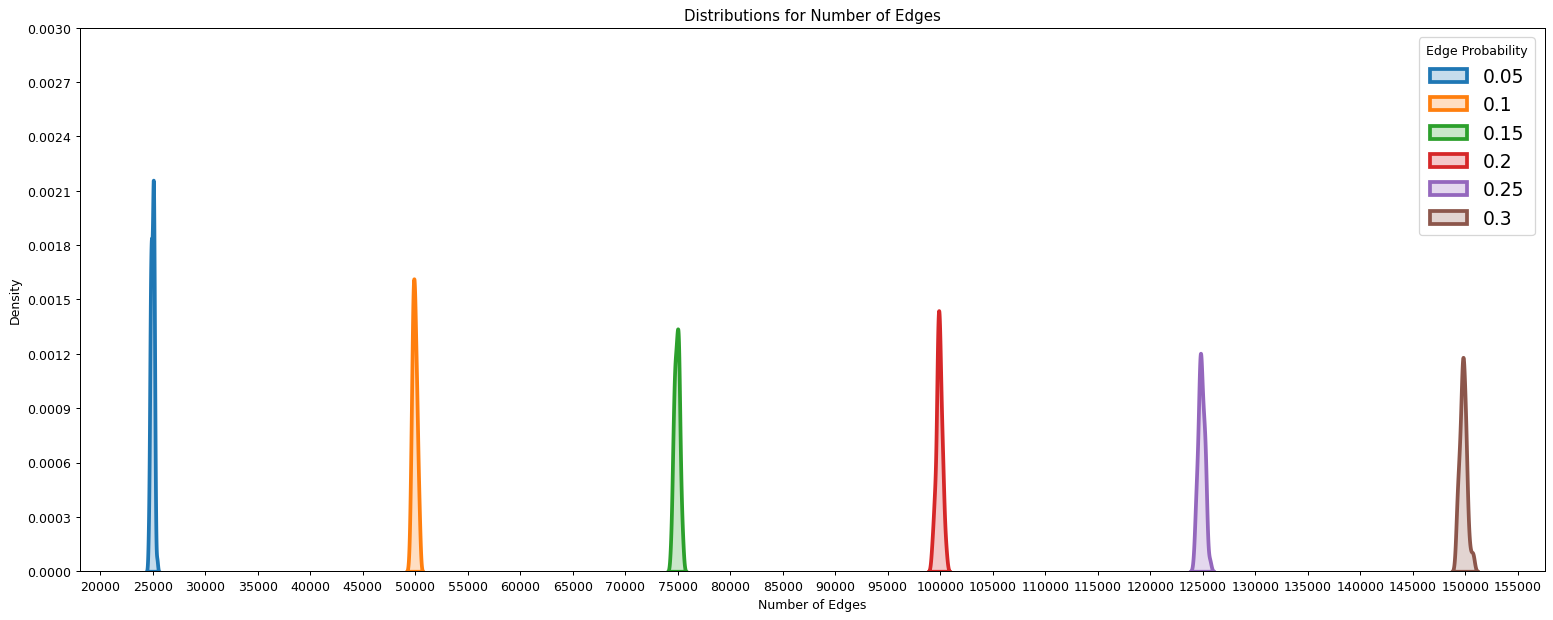

In [26]:
figure(figsize=(21,8), dpi=90)
for p in pValues:
    subset = edgeDict[p]
    ax = sns.kdeplot(subset, linewidth =  3, label = p, shade=True)
    

plt.legend(prop={'size': 15}, title = 'Edge Probability')
plt.title('Distributions for Number of Edges')
plt.xlabel('Number of Edges')
plt.xticks(list(range(20000,160000,5000)))
plt.yticks(list(np.arange(0,0.003,0.0003)))
plt.ylabel('Density')



# Network generation and node properties

Request and download dataset for your own social media accounts and analyze using network science methods.

If you are not a frequent user, you can select 3 networks with different categorical subdomains using the database below.

https://icon.colorado.edu/#!/networks

Please keep the networks smaller than 10.000 nodes.

Explore the different algorithms available on networkx for node and graph level properties.
https://networkx.org/documentation/stable/reference/algorithms/index.html

You should cover at least 
- node clustering coefficient, degree, strength
- graph density, largest connected components size, radius

## Network analysis

### Star Wars Coappearances
Social Fictional

**Edge Type:** Coappearance

**Node Type:** Character

**Network Type:** Undirected, Weighted

*starwars-episode-5-interactions.json* is used from ***github.com/evelinag/StarWars-social-network/tree/master/networks***

In [27]:
def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph, multigraph = False)

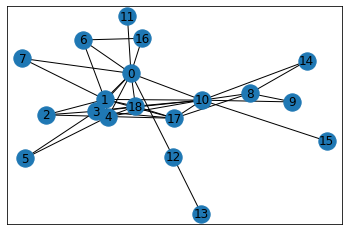

In [28]:
# Load network
swGraph = read_json_file("starwars-episode-5-interactions.json")
nx.set_node_attributes(swGraph, dict(swGraph.degree()), "degree") # adding degree
nx.set_node_attributes(swGraph, nx.clustering(swGraph), "node_clustering_coefficient") # adding clustering coefficient
nx.set_node_attributes(swGraph, nx.degree_centrality(swGraph), "degree_centrality") # adding degree_centrality
nx.set_node_attributes(swGraph, nx.closeness_centrality(swGraph), "closeness_centrality") # adding closeness_centrality


weights = {}
for edge in swGraph.edges():
    weights[edge] = {}
    weights[edge]["weight"] = swGraph.get_edge_data(*edge)["value"]
nx.set_edge_attributes(swGraph, weights)
nx.set_node_attributes(swGraph, dict(swGraph.degree(weight="weight")), "strength") # adding strength

nx.write_gexf(swGraph, "swGraph.gexf")
nx.draw_networkx(swGraph)

In [29]:
print("Graph density is:",nx.density(swGraph))
print("Graph's largest connected components size is:", len(max(nx.connected_components(swGraph), key=len)))
print("Graph radius is:",nx.radius(swGraph))
print("Is the graph is AT-free?",nx.is_at_free(swGraph))
print("Is graph connected?",nx.is_connected(swGraph))
print("Is graph chordal?",nx.is_chordal(swGraph))
print("Graph's wiener_index is:",nx.wiener_index(swGraph,weight="weight"))
print("Number of nodes is:",swGraph.number_of_nodes())
print("Number of edges is:",swGraph.number_of_edges())
print("Degree . of graph is:",nx.degree_assortativity_coefficient(swGraph))

Graph density is: 0.23976608187134502
Graph's largest connected components size is: 19
Graph radius is: 2
Is the graph is AT-free? False
Is graph connected? True
Is graph chordal? True
Graph's wiener_index is: 585.0
Number of nodes is: 19
Number of edges is: 41
Degree . of graph is: -0.20024026302478537


### E. coli transcription network (2002)
Biological Gene regulation

**Edge Type:** Regulation

**Node Type:** Operon

**Network Type:** Directed, Unweighted

*coliInterFullNames.txt* and *coliInterFullVec.txt* is used from ***weizmann.ac.il/mcb/UriAlon/e-coli-transcription-network***

In [30]:
interactionType = {'1':"activator", '2': "repressor", '3': "dual"}

In [31]:
coliInterFullNames = open("coliInterFullNames.txt", 'r')
nodes = []
coliNames = {}
for line in coliInterFullNames:
    line = line.strip().split()
    coliNames[line[0]] = line[1]
    if line[1] not in nodes:
        nodes.append(line[1])

edges = []
interactTypeDict = {}
coliInterFullVec = open("coliInterFullVec.txt", 'r')
for line in coliInterFullVec:
    line = line.strip().split()
    edge = (coliNames[line[0]],coliNames[line[1]])
    edges.append(edge)
    interactTypeDict[edge] = {}
    interactTypeDict[edge]["interactionType"] = interactionType[line[2]]

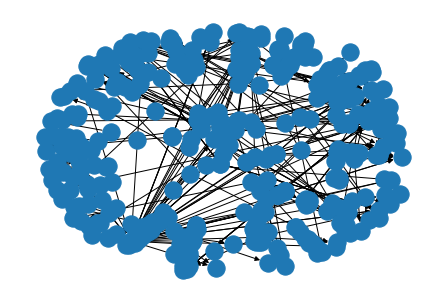

In [32]:
coliNetwork = nx.DiGraph()
coliNetwork.add_nodes_from(nodes)
coliNetwork.add_edges_from(edges)
nx.set_edge_attributes(coliNetwork, interactTypeDict)
nx.set_node_attributes(coliNetwork, dict(coliNetwork.in_degree()), "in_degree") # adding indegree
nx.set_node_attributes(coliNetwork, dict(coliNetwork.out_degree()), "out_degree") # adding outdegree
nx.set_node_attributes(coliNetwork, nx.in_degree_centrality(coliNetwork), "indegree_centrality") # adding indegree_centrality
nx.set_node_attributes(coliNetwork, nx.out_degree_centrality(coliNetwork), "outdegree_centrality") # adding outdegree_centrality
nx.set_node_attributes(coliNetwork, nx.closeness_centrality(coliNetwork), "closeness_centrality") # adding closeness_centrality

nx.write_gexf(coliNetwork, "coliNetwork.gexf")
nx.draw(coliNetwork)

In [33]:
print("Graph density is:",nx.density(coliNetwork))
print("Is graph strongly connected?",nx.is_strongly_connected(coliNetwork))
print("Is graph weakly connected?",nx.is_weakly_connected(coliNetwork))
print("Does graph have an eularian path?",nx.is_eulerian(coliNetwork))
print("Number of nodes is:",coliNetwork.number_of_nodes())
print("Number of edges is:",coliNetwork.number_of_edges())
print("Degree assortativity of graph is:",nx.degree_assortativity_coefficient(coliNetwork))

Graph density is: 0.0032379863982163063
Is graph strongly connected? False
Is graph weakly connected? False
Does graph have an eularian path? False
Number of nodes is: 423
Number of edges is: 578
Degree assortativity of graph is: 0.08470727698487572


## Twitter Following & Follower Network

I requested my data from Twitter for my academic account ***@turhanberk99***

Social Online

**Edge Type:** Accounts

**Node Type:** Following

**Network Type:** Directed, Unweighted


In [34]:
myAccount = "@turhanberk99"
idName = {}
idNameFile = open("id-names.txt", 'r')
for line in idNameFile:
    line = line.strip()
    line = line.split(" => ")
    id = line[0]
    name = line[1]
    if id not in idName:
        idName[id]=name

In [35]:
nodes = [myAccount]
edges = []

isItMutual = {'@turhanberk': {'mutual': "self"}}

followerJSON = open("follower.js", 'r')
for line in followerJSON:
    line = line.strip()
    if line.startswith('"accountId"'):
        id = line[15:-2]
        name = idName[id]
        if name not in nodes:
            nodes.append(name)
        edges.append((name,myAccount))

followingJSON = open("following.js", 'r')
for line in followingJSON:
    line = line.strip()
    if line.startswith('"accountId"'):
        id = line[15:-2]
        name = idName[id]
        if name not in nodes:
            nodes.append(name)
        edges.append((myAccount,name))

for edge in edges:
    if (edge[1],edge[0]) in edges:
        if edge[0] == myAccount:
            isItMutual[edge[1]] = {}
            isItMutual[edge[1]]["mutual"] = "true"
        elif edge[1] == myAccount:
            isItMutual[edge[0]] = {}
            isItMutual[edge[0]]["mutual"] = "true"
    else:
        if edge[0] == myAccount:
            isItMutual[edge[1]] = {}
            isItMutual[edge[1]]["mutual"] = "false"
        elif edge[1] == myAccount:
            isItMutual[edge[0]] = {}
            isItMutual[edge[0]]["mutual"] = "false"

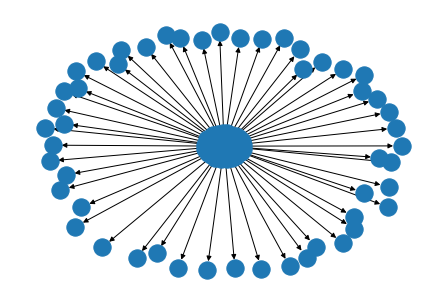

In [36]:
twitterNW = nx.DiGraph()
twitterNW.add_nodes_from(nodes)
twitterNW.add_edges_from(edges)
nx.set_node_attributes(twitterNW, isItMutual)
nx.set_node_attributes(twitterNW, dict(twitterNW.in_degree()), "in_degree") # adding indegree
nx.set_node_attributes(twitterNW, dict(twitterNW.out_degree()), "out_degree") # adding outdegree
nx.set_node_attributes(twitterNW, nx.in_degree_centrality(twitterNW), "indegree_centrality") # adding indegree_centrality
nx.set_node_attributes(twitterNW, nx.out_degree_centrality(twitterNW), "outdegree_centrality") # adding outdegree_centrality
nx.set_node_attributes(twitterNW, nx.clustering(twitterNW), "node_clustering_coefficient") # adding clustering coefficient
nx.set_node_attributes(twitterNW, nx.closeness_centrality(twitterNW), "closeness_centrality") # adding closeness_centrality
nx.write_gexf(twitterNW, "twitterNW.gexf")
nx.draw(twitterNW)


In [37]:
print("Graph density is:",nx.density(twitterNW))
print("Is graph strongly connected?",nx.is_strongly_connected(twitterNW))
print("Is graph weakly connected?",nx.is_weakly_connected(twitterNW))
print("Does graph have an eularian path?",nx.is_eulerian(twitterNW))
print("Number of nodes is:",twitterNW.number_of_nodes())
print("Number of edges is:",twitterNW.number_of_edges())
print("Degree assortativity of graph is:",nx.degree_assortativity_coefficient(twitterNW))

Graph density is: 0.014870738961336078
Is graph strongly connected? False
Is graph weakly connected? True
Does graph have an eularian path? False
Number of nodes is: 94
Number of edges is: 130
Degree assortativity of graph is: -1.0000000000000002


# Cayley tree

You can find more information about Cayley tree or bethe lattice below

https://en.wikipedia.org/wiki/Bethe_lattice

In [48]:
cayleyTree = nx.balanced_tree(r=5,h=8)
# r is the branching factor, therefore menaing nodes having degree equal to k=5
# h is the height of the tree, where it will be equal to d = 8

In [49]:
cayleyTree = nx.balanced_tree(r=5,h=4)
# However, since I do not have enough memory to visualize 488281 nodes, I will only consider the d as 4
# where tree will basically grow with the same fashion until the longest path become 8
nx.write_gexf(cayleyTree, "cayleyTree.gexf")

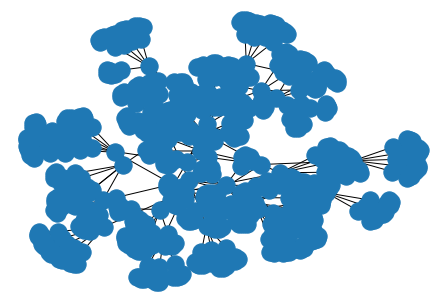

In [50]:
nx.draw(cayleyTree)